<a href="https://colab.research.google.com/github/sivaparvathi1234/siva-parvathi_INFO5502_Spring2022/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The sixth Lab-assignment (03/24/2022, 50 points in total)

The purpose of this exercise is to build a simple predicition model which can helpyou understand the workflow of machine learning. 

### Task Decription 

The goal of this assignment is to predict bike share use, given the hour, day, and information about the weather. Companies like Divvy try to predict how much demand there will be for bikes on any given day to allocate resources to redistribute bikes so that, ideally, very few bike stations are ever full (when you can’t park your bike) or empty (when you can’t pick up a bike if you want to).

The data (link: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/lab_assignment_06) in Github provides detailed information on the data set and necessary downloads.

### Data Description

You are provided hourly rental data spanning two years (link: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/lab_assignment_06). For this task, the training set is comprised of the first 16 days of each month, while the test set is the 17-19th day of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period. That is, predict "count" without using "count" or its components "casual" and "registered".

Data Fields

datetime - hourly date + timestamp

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather -

1 - Clear, Few clouds, Partly cloudy, Partly cloudy

2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

### Output

Submission Format

Your output (a separate file) must have a header line and should be structured in the following format:

 datetime,count
 
 2011-01-20 00:00:00,0 
 
 2011-01-20 01:00:00,0
 
 2011-01-20 02:00:00,0
 
 ...
 
The tutorial code should demonstrate how to generate such a file from a very simple prediction model. Note, these prediction are to be done on the test file under the data tab, where you do not know the actual count, and should match the rows of the test file in count and order.

Your predictions should be compared to the ground truth information (sample_prediction.csv). Score are calculated using Root Mean Squared Error (RMSE).

### Tips

●	Add features: Pick columns/features from the data you already have. Or make a new feature from the ones you have. For example, the tutorial makes ‘hour’ from the datetime stamp, which seemed very useful. How about ‘month’?

●	Model selection: Try different models. Make sure they are regression models rather than classification models. Tip: random forest regression is a good, all around modeling strategy on complicated data sets.

●	Model tuning: Almost all regression models have parameters to tune (“hyperparameters”). E.g. polynomial regression has the degree of the polynomial (n = 1 for a line, n=2 for a quadratic fit, n=3 for a cubic fit…). Generally, one extreme makes the model too simple (e.g. a line for a curved set of points) and the other extreme makes the model overfit/be too complex, and usually the right choice is in between. For some models it is obvious what to tune (e.g. k for k nearest neighbors regression) and some don’t need much tuning with defaults that often work well. e.g. try changing the number of trees used in the random forest model!

●	Cross validation: The tutorial has a simple way of separating training and test data, however, there are better ways of splitting training and test data. Look into cross validation techniques, which are more reliable than an arbitrary split of training and test data.

●	Separate models for ...: Notice that count comes from just adding casual riders and registered riders. However, what if these two types of riders acted very differently? It might make sense to make two separate models and just add the results of both models together. This is also true for any subsets of your data that may behave wildly differently (e.g. create a separate model for each season?)

### Your code

In [71]:
### You code here:
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

data = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_06/train_luc.csv")

# converting datetime column to datetime datatype
data['datetime']=pd.to_datetime(data.datetime)
# we extract hour, day, month values from datetime
data['hour'] = data['datetime'].dt.hour
data['day'] = data['datetime'].dt.day
data['month'] = data['datetime'].dt.month
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1


In [72]:
data.shape

(9174, 15)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9174 entries, 0 to 9173
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    9174 non-null   datetime64[ns]
 1   season      9174 non-null   int64         
 2   holiday     9174 non-null   int64         
 3   workingday  9174 non-null   int64         
 4   weather     9174 non-null   int64         
 5   temp        9174 non-null   float64       
 6   atemp       9174 non-null   float64       
 7   humidity    9174 non-null   int64         
 8   windspeed   9174 non-null   float64       
 9   casual      9174 non-null   int64         
 10  registered  9174 non-null   int64         
 11  count       9174 non-null   int64         
 12  hour        9174 non-null   int64         
 13  day         9174 non-null   int64         
 14  month       9174 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(11)
memory usage: 1.1 MB


In [74]:
data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
hour          0
day           0
month         0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


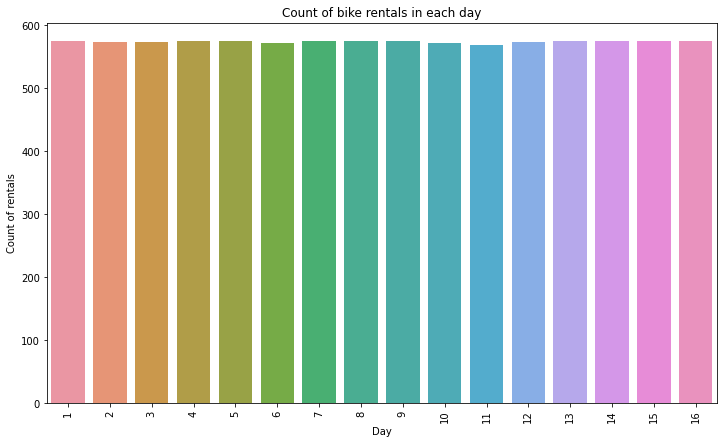

In [75]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [12, 7]
ax = sns.countplot(data['day'])

plt.title("Count of bike rentals in each day")
plt.xlabel("Day")
plt.ylabel("Count of rentals")
plt.xticks(rotation=90)
plt.show()

. We observe that there are almost same no of rentals on all days

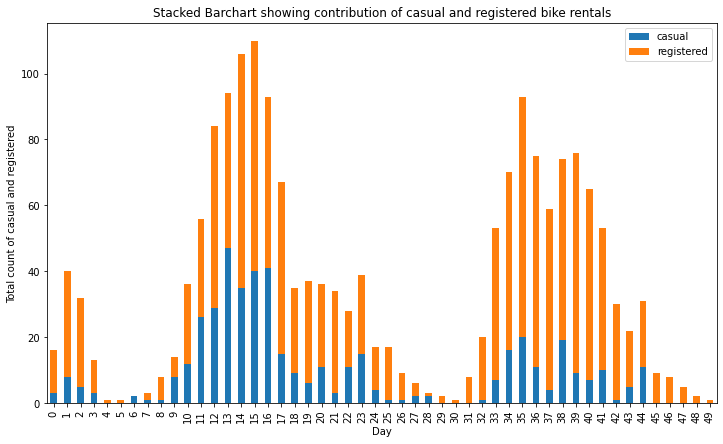

In [76]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [12, 7]
data[['casual', 'registered']][:50].plot(kind='bar', stacked=True)
plt.title("Stacked Barchart showing contribution of casual and registered bike rentals")
plt.xlabel("Day")
plt.ylabel("Total count of casual and registered")
plt.xticks(rotation=90)
plt.show()

. We observe that from the first 50 records, the majority of the rentals are from the registered customers rather than the casual customers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


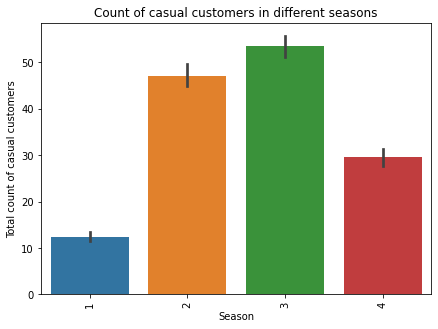

In [77]:
import seaborn as sns
# data['season'] = data['season'].astype('str')
plt.rcParams['figure.figsize'] = [7, 5]
# sns.barplot(data['season'])
ax = sns.barplot('season', 'casual', data = data)
#ax.bar_label(ax.containers[0])
plt.title("Count of casual customers in different seasons")
plt.xlabel("Season")
plt.ylabel("Total count of casual customers")
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


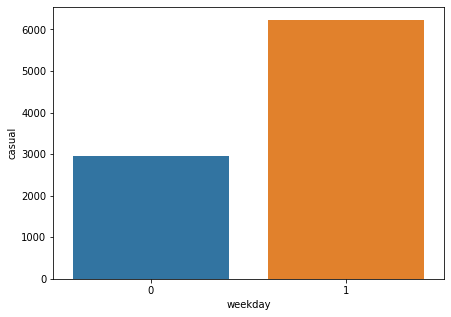

In [78]:
ax = sns.countplot(data['workingday'])

plt.xlabel('weekday')
plt.ylabel('casual')
plt.show()

. We can observe that the majority of the rentals are from the weekdays.

In [79]:
# we convert the below columns into categorical
for i in ['season', 'weather', 'holiday', 'workingday']:
    data[i] = data[i].astype('object')

# Dummification of the below columns in the dataset
one_hot_df = pd.get_dummies(data[['season', 'holiday', 'workingday', 'weather']])
# we drop unnecessary columns
X = data.drop(['datetime','casual','registered', 'season', 'holiday', 'workingday', 'weather', 'day', 'count'], axis=1)
# we append the dummies data to the original data
X = X.join(one_hot_df)
# target column
y = data['count']

# Cross Validation

In [80]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# We split the dataset using Kfold cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=None)
for train, test in kfold.split(data):
    print('train: %s, test: %s' % (train, test))

train: [   0    1    2 ... 9171 9172 9173], test: [   5    7   10 ... 9164 9166 9167]
train: [   0    1    2 ... 9171 9172 9173], test: [  11   12   14 ... 9157 9158 9159]
train: [   1    3    5 ... 9171 9172 9173], test: [   0    2    4 ... 9154 9162 9163]
train: [   0    2    3 ... 9169 9171 9173], test: [   1    6    8 ... 9168 9170 9172]
train: [   0    1    2 ... 9168 9170 9172], test: [   3    9   13 ... 9169 9171 9173]


# Prediction of test dataset

In [81]:
# load the test dataset
test_data = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_06/test_luc.csv")
# change the dataset type to datatime
test_data['datetime'] = pd.to_datetime(test_data.datetime)
# we extract the hour and month
test_data['hour'] = test_data['datetime'].dt.hour
test_data['month'] = test_data['datetime'].dt.month
# convert the following columns datatype to categorical
for i in ['season', 'weather', 'holiday', 'workingday']:
    test_data[i] = test_data[i].astype('object')

one_hot_test_data = pd.get_dummies(test_data[['season', 'holiday', 'workingday', 'weather']])
test_data = test_data.drop(['datetime', 'season', 'holiday', 'workingday', 'weather'], axis=1)
test_data = test_data.join(one_hot_test_data)

In [82]:
# test data doesn't have weather category 4
# we append that column
test_data['weather_4'] = 0

In [83]:
print(test_data.columns)
print(X.columns)

Index(['temp', 'atemp', 'humidity', 'windspeed', 'hour', 'month', 'season_1',
       'season_2', 'season_3', 'season_4', 'holiday_0', 'holiday_1',
       'workingday_0', 'workingday_1', 'weather_1', 'weather_2', 'weather_3',
       'weather_4'],
      dtype='object')
Index(['temp', 'atemp', 'humidity', 'windspeed', 'hour', 'month', 'season_1',
       'season_2', 'season_3', 'season_4', 'holiday_0', 'holiday_1',
       'workingday_0', 'workingday_1', 'weather_1', 'weather_2', 'weather_3',
       'weather_4'],
      dtype='object')


# Linear Regression

In [84]:
# Applying Linear Regression to find the customers count of Rentals
lr = LinearRegression()
lr.fit(X.iloc[train], y.iloc[train])
lr_ypred = lr.predict(X.iloc[test])
# finding mean square error
mse = mean_squared_error(y.iloc[test], lr_ypred)
print("RMSE:", np.sqrt(mse))
# finding R2 Score
r_squared = r2_score(y.iloc[test], lr_ypred)
print("R2 Score:", r_squared)
# predicting values
lr_test_pred = lr.predict(test_data)
lr_test_pred

RMSE: 148.25188862104162
R2 Score: 0.3361183510125415


array([  3.49493032,  16.04764556,  17.13392276, ..., 259.26596091,
       270.53994055, 262.76445676])

# DecisionTreeRegressor

In [85]:
from sklearn.tree import DecisionTreeRegressor
# Using Decision Tree Regressor model to find the count values
dtreg = DecisionTreeRegressor(random_state=211)
dtreg.fit(X.iloc[train], y.iloc[train])
dtreg_ypred = dtreg.predict(X.iloc[test])
mse = mean_squared_error(y.iloc[test], dtreg_ypred)
print("RMSE:", np.sqrt(mse))
r_squared = r2_score(y.iloc[test], dtreg_ypred)
print("R2 Score:", r_squared)
dtreg_test_pred = dtreg.predict(test_data)
dtreg_test_pred

RMSE: 89.4835273278363
R2 Score: 0.7581331297308571


array([ 50.,  50.,  42., ..., 162., 104.,  57.])

# RandomForestRegressor

In [86]:
from sklearn.ensemble import RandomForestRegressor
# using Random Forest Regressor to find the count values
rfreg = RandomForestRegressor(random_state = 211)
rfreg.fit(X.iloc[train], y.iloc[train])
rfreg_ypred = rfreg.predict(X.iloc[test])
mse = mean_squared_error(y.iloc[test], rfreg_ypred)
print("RMSE:", np.sqrt(mse))
r_squared = r2_score(y.iloc[test], rfreg_ypred)
print("R2 Score: ", r_squared)
rfreg_test_pred = rfreg.predict(test_data)
rfreg_test_pred

RMSE: 69.69916754602437
R2 Score:  0.8532610601947632


array([ 39.54,  30.44,  33.91, ..., 159.65, 133.24,  96.  ])

In [87]:
test_data = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_06/test_luc.csv")
test_data['count'] = rfreg_test_pred

In [88]:
test_data[['datetime', 'count']]

,datetime,count
0,2011-01-17 00:00:00,39.54
1,2011-01-17 01:00:00,30.44
2,2011-01-17 02:00:00,33.91
3,2011-01-17 03:00:00,10.28
4,2011-01-17 04:00:00,6.08
...,...,...
1707,2012-12-19 19:00:00,371.16
1708,2012-12-19 20:00:00,235.56
1709,2012-12-19 21:00:00,159.65
1710,2012-12-19 22:00:00,133.24


In [89]:
# since the RMSE is low for RF Regressor and R2 Score is less for RF Regressor
# we save the predicted values from RF Regressor model
test_df = test_data[['datetime','count']].to_csv('parvathi_prediction.csv', index=False, header=True)

# Building Seperate models for Casual and Registered customers

# Prediction of Casual Customers

In [90]:
X = data.drop(['datetime','casual','registered', 'season', 'holiday', 'workingday', 'weather', 'day', 'count'], axis=1)
X = X.join(one_hot_df)
y = data['casual']

In [91]:
test_data = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_06/test_luc.csv")

test_data['datetime'] = pd.to_datetime(test_data.datetime)

test_data['hour'] = test_data['datetime'].dt.hour
#test_data['day'] = test_data['datetime'].dt.day
test_data['month'] = test_data['datetime'].dt.month

for i in ['season', 'weather', 'holiday', 'workingday']:
    test_data[i] = test_data[i].astype('object')

one_hot_test_data = pd.get_dummies(test_data[['season', 'holiday', 'workingday', 'weather']])
test_data = test_data.drop(['datetime', 'season', 'holiday', 'workingday', 'weather'], axis=1)
test_data = test_data.join(one_hot_test_data)

In [92]:
test_data['weather_4'] = 0

# Casual Customers count prediction using Linear Regression

In [93]:
# Using Lin Regression for predicting Casual customers
lr = LinearRegression()
lr.fit(X.iloc[train], y.iloc[train])
lr_ypred = lr.predict(X.iloc[test])
mse = mean_squared_error(y.iloc[test], lr_ypred)
print("RMSE:", np.sqrt(mse))
r_squared = r2_score(y.iloc[test], lr_ypred)
print("R2 Score:", r_squared)
lr_test_pred = lr.predict(test_data)
lr_test_pred

RMSE: 34.708254134298464
R2 Score: 0.48587008885426664


array([11.29113252, 14.51662326, 12.89353283, ..., 19.51453141,
       23.15301988, 18.42363704])

# Casual Customers count prediction using DecisionTreeRegressor

In [94]:
from sklearn.tree import DecisionTreeRegressor
# Using DecisionTree Regressor for predicting Casual customers
dtreg = DecisionTreeRegressor(random_state=211)
dtreg.fit(X.iloc[train], y.iloc[train])
dtreg_ypred = dtreg.predict(X.iloc[test])
mse = mean_squared_error(y.iloc[test], dtreg_ypred)
print("RMSE:", np.sqrt(mse))
r_squared = r2_score(y.iloc[test], dtreg_ypred)
print("R2 Score:", r_squared)
dtreg_test_pred = dtreg.predict(test_data)
dtreg_test_pred

RMSE: 24.736925542154196
R2 Score: 0.7388447400881935


array([ 6.,  6.,  0., ..., 14., 11., 20.])

# Casual Customers count prediction using RandomForestRegressor

In [95]:
from sklearn.ensemble import RandomForestRegressor
# Using RandomForest Regressor for predicting Casual customers
rfreg = RandomForestRegressor(random_state = 211)
rfreg.fit(X.iloc[train], y.iloc[train])
rfreg_ypred = rfreg.predict(X.iloc[test])
mse = mean_squared_error(y.iloc[test], rfreg_ypred)
print("RMSE:", np.sqrt(mse))
r_squared = r2_score(y.iloc[test], rfreg_ypred)
print("R2 Score:", r_squared)
rfreg_test_pred = rfreg.predict(test_data)
rfreg_test_pred

RMSE: 17.142783606689303
R2 Score: 0.874579069117009


array([ 3.67,  2.88,  2.96, ..., 10.27, 10.58,  7.65])

In [96]:
# since the RMSE is low for RF Regressor and R2 Score is less for RF Regressor
# we save the predicted values from RF Regressor model
test_data = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_06/test_luc.csv")
test_data['count'] = rfreg_test_pred
test_df = test_data[['datetime','count']].to_csv('parvathi_casual_customers_prediction.csv', index=False, header=True)

# Prediction of Registered Customers

In [97]:
X = data.drop(['datetime','casual','registered', 'season', 'holiday', 'workingday', 'weather', 'day', 'count'], axis=1)
X = X.join(one_hot_df)
y = data['registered']

In [98]:
test_data = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_06/test_luc.csv")

test_data['datetime'] = pd.to_datetime(test_data.datetime)

test_data['hour'] = test_data['datetime'].dt.hour
#test_data['day'] = test_data['datetime'].dt.day
test_data['month'] = test_data['datetime'].dt.month

for i in ['season', 'weather', 'holiday', 'workingday']:
    test_data[i] = test_data[i].astype('object')

one_hot_test_data = pd.get_dummies(test_data[['season', 'holiday', 'workingday', 'weather']])
test_data = test_data.drop(['datetime', 'season', 'holiday', 'workingday', 'weather'], axis=1)
test_data = test_data.join(one_hot_test_data)
test_data['weather_4'] = 0

# Registered Customers count prediction using Linear Regression

In [99]:
# using Linear Regression to find the registered customers count
lr = LinearRegression()
lr.fit(X.iloc[train], y.iloc[train])
lr_ypred = lr.predict(X.iloc[test])
mse = mean_squared_error(y.iloc[test], lr_ypred)
print("RMSE:", np.sqrt(mse))
r_squared = r2_score(y.iloc[test], lr_ypred)
print("R2 Score:", r_squared)
lr_test_pred = lr.predict(test_data)
lr_test_pred

RMSE: 131.42798165268712
R2 Score: 0.2665075003006253


array([ -7.7962022 ,   1.5310223 ,   4.24038993, ..., 239.75142949,
       247.38692067, 244.34081971])

# Registered Customers count prediction using DecisionTreeRegressor

In [100]:
from sklearn.tree import DecisionTreeRegressor
# using Decision Tree Regressor to find the registered customers count
dtreg = DecisionTreeRegressor(random_state=211)
dtreg.fit(X.iloc[train], y.iloc[train])
dtreg_ypred = dtreg.predict(X.iloc[test])
mse = mean_squared_error(y.iloc[test], dtreg_ypred)
print("RMSE:", np.sqrt(mse))
r_squared = r2_score(y.iloc[test], dtreg_ypred)
print("R2 Score:", r_squared)
dtreg_test_pred = dtreg.predict(test_data)
dtreg_test_pred

RMSE: 81.8665171835764
R2 Score: 0.7154014848252832


array([ 42.,  42.,  38., ..., 193., 141., 108.])

# Registered Customers count prediction using RandomForestRegressor

In [101]:
from sklearn.ensemble import RandomForestRegressor
# using Random Forest Regressor to find the registered customers count
rfreg = RandomForestRegressor(random_state = 211)
rfreg.fit(X.iloc[train], y.iloc[train])
rfreg_ypred = rfreg.predict(X.iloc[test])
mse = mean_squared_error(y.iloc[test], rfreg_ypred)
print("RMSE:", np.sqrt(mse))
r_squared = r2_score(y.iloc[test], rfreg_ypred)
print("R2 Score:",r_squared)
rfreg_test_pred = rfreg.predict(test_data)
rfreg_test_pred

RMSE: 60.93202289726438
R2 Score: 0.8423437494961914


array([ 34.66,  24.97,  27.56, ..., 150.06, 126.68,  89.64])

In [102]:
# since the RMSE is low for RF Regressor and R2 Score is less for RF Regressor
# we save the predicted values from RF Regressor model
test_data = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_06/test_luc.csv")
test_data['count'] = rfreg_test_pred
test_df = test_data[['datetime','count']].to_csv('parvathi_registered_customers_prediction.csv', index=False, header=True)